In [2]:
import pandas
import numpy
import matplotlib.pylab

In [38]:
entry_data = pandas.read_csv("E:/数据集/2、跨境入境数据集/Border_Crossing_Entry_Data.csv")

In [39]:
entry_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [40]:
pandas.unique(entry_data["Measure"])

array(['Trucks', 'Rail Containers Full', 'Trains',
       'Personal Vehicle Passengers', 'Bus Passengers',
       'Truck Containers Empty', 'Rail Containers Empty',
       'Personal Vehicles', 'Buses', 'Truck Containers Full',
       'Pedestrians', 'Train Passengers'], dtype=object)

In [4]:
pandas.notnull(entry_data).all()

Port Name    True
State        True
Port Code    True
Border       True
Date         True
Measure      True
Value        True
Location     True
dtype: bool

In [42]:
data = entry_data[~entry_data["Value"].isin([0])]

In [43]:
group_data = pandas.qcut(data["Value"],10)

In [44]:
group_data.value_counts().values

array([22819, 22464, 22434, 22434, 22431, 22430, 22427, 22427, 22351,
       22129], dtype=int64)

In [137]:
group_data.head()

,Value
0,"(15820.0, 66872.0]"
1,"(187.0, 471.0]"
2,"(66872.0, 4447374.0]"
3,"(20.0, 65.0]"
4,"(15820.0, 66872.0]"


In [45]:
group_count = pandas.qcut(data["Value"],10)
group_count.value_counts()

(0.999, 20.0]           22819
(65.0, 187.0]           22464
(66872.0, 4447374.0]    22434
(15820.0, 66872.0]      22434
(471.0, 999.0]          22431
(5426.0, 15820.0]       22430
(2203.0, 5426.0]        22427
(999.0, 2203.0]         22427
(187.0, 471.0]          22351
(20.0, 65.0]            22129
Name: Value, dtype: int64

In [46]:
value_label = pandas.unique(group_data)
value_label

[(15820.0, 66872.0], (187.0, 471.0], (66872.0, 4447374.0], (20.0, 65.0], (65.0, 187.0], (999.0, 2203.0], (5426.0, 15820.0], (471.0, 999.0], (0.999, 20.0], (2203.0, 5426.0]]
Categories (10, interval[float64]): [(0.999, 20.0] < (20.0, 65.0] < (65.0, 187.0] < (187.0, 471.0] ... (2203.0, 5426.0] < (5426.0, 15820.0] < (15820.0, 66872.0] < (66872.0, 4447374.0]]

### 绘制柱状图

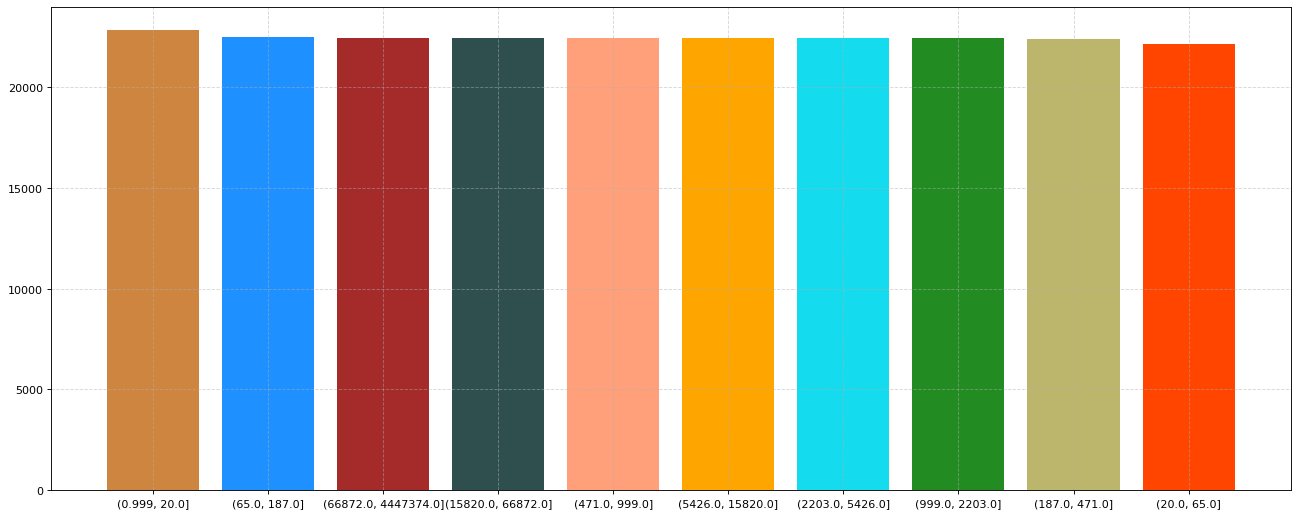

In [47]:
# 1、创建画布
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
# 2、绘制柱状图
matplotlib.pylab.bar(['(0.999, 20.0]','(65.0, 187.0]','(66872.0, 4447374.0]','(15820.0, 66872.0]','(471.0, 999.0]','(5426.0, 15820.0]','(2203.0, 5426.0]','(999.0, 2203.0]','(187.0, 471.0]','(20.0, 65.0]'],
                     group_data.value_counts().values,
                    color=['#CD853F','#1E90FF','#A52A2A','#2F4F4F','#FFA07A','#FFA500','#14DBED','#228B22','#BBB66B','#FF4500','#4B0082','#90EE90'])
# 添加网格
matplotlib.pylab.grid(linestyle="--",alpha=0.5)

# 3、显示图像
matplotlib.pylab.show()

In [22]:
group_count.value_counts().values

array([22819, 22464, 22434, 22434, 22431, 22430, 22427, 22427, 22351,
       22129], dtype=int64)

In [30]:
data = pandas.unique(group_count)

In [31]:
data = pandas.DataFrame(data)

In [50]:
data[0].values

array([Interval(15820.0, 66872.0, closed='right'),
       Interval(187.0, 471.0, closed='right'),
       Interval(66872.0, 4447374.0, closed='right'),
       Interval(20.0, 65.0, closed='right'),
       Interval(65.0, 187.0, closed='right'),
       Interval(999.0, 2203.0, closed='right'),
       Interval(5426.0, 15820.0, closed='right'),
       Interval(471.0, 999.0, closed='right'),
       Interval(0.999, 20.0, closed='right'),
       Interval(2203.0, 5426.0, closed='right')], dtype=object)

### 绘制测量使用的工具占比

In [3]:
entry_data = pandas.read_csv("E:/数据集/2、跨境入境数据集/Border_Crossing_Entry_Data.csv")
entry_data.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [4]:
measure_data = entry_data["Measure"]

In [5]:
measure_count = entry_data.loc[:,"Measure"].value_counts().values

In [6]:
measure_label = pandas.unique(measure_data)

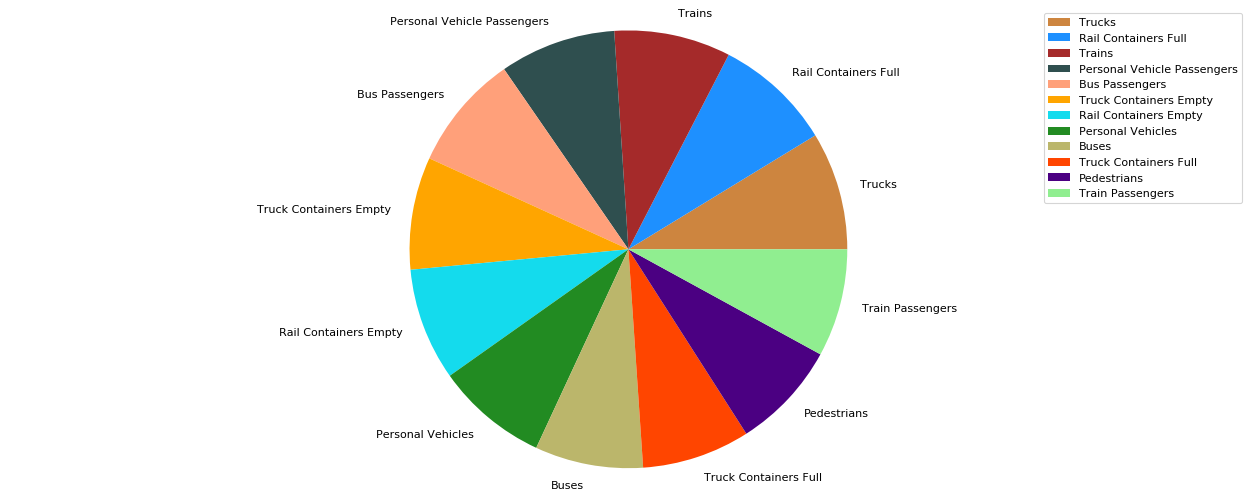

In [37]:
# 1、创建画布
matplotlib.pylab.figure(figsize=(20,8),dpi=80)
# 2、绘制饼图
matplotlib.pylab.pie(measure_count,labels=measure_label,colors=['#CD853F','#1E90FF','#A52A2A','#2F4F4F','#FFA07A','#FFA500','#14DBED','#228B22','#BBB66B','#FF4500','#4B0082','#90EE90'])
# 添加图例
matplotlib.pylab.legend()
matplotlib.pylab.axis("equal")
# 3、显示图像
matplotlib.pylab.show()

In [32]:
measure_count = measure_count.astype('float64')

In [33]:
measure_label

array(['Trucks', 'Rail Containers Full', 'Trains',
       'Personal Vehicle Passengers', 'Bus Passengers',
       'Truck Containers Empty', 'Rail Containers Empty',
       'Personal Vehicles', 'Buses', 'Truck Containers Full',
       'Pedestrians', 'Train Passengers'], dtype=object)

In [34]:
measure_count

array([30219., 30196., 29856., 29757., 29694., 28822., 28820., 28697.,
       27708., 27684., 27657., 27623.])